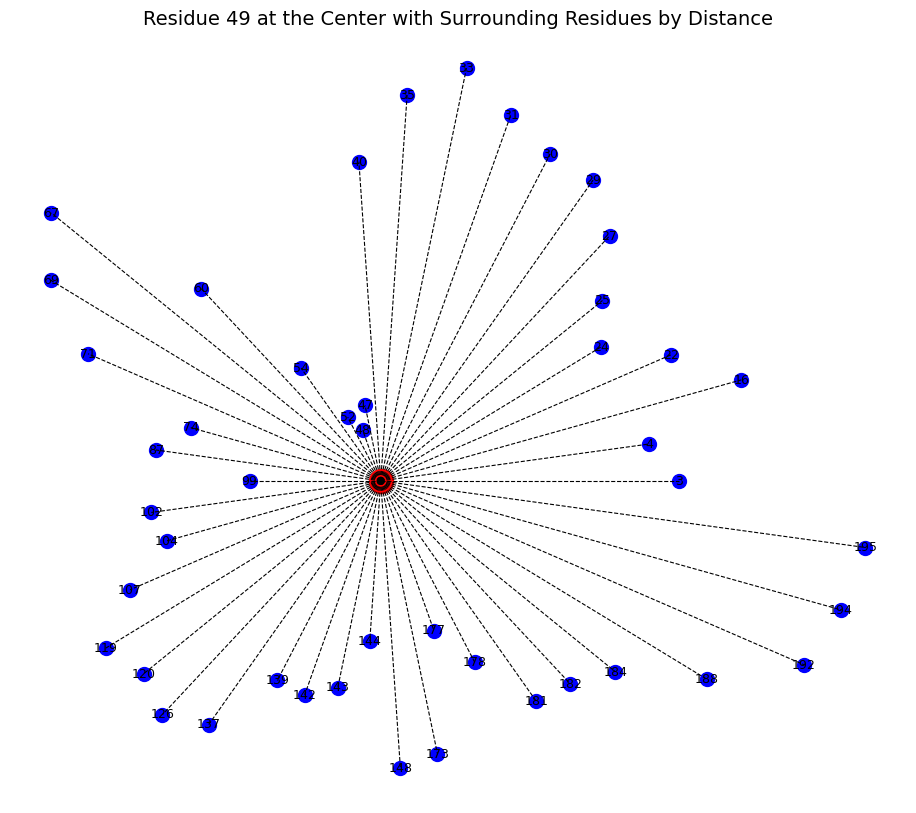

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# Residue numbers and distances (Å) provided
residues = [
    (3, 21.63), (4, 19.64), (16, 27.12), (22, 22.91), (24, 18.69), 
    (25, 20.7), (27, 24.28), (29, 26.66), (30, 26.67), (31, 28.12),
    (33, 30.54), (35, 28.03), (40, 23.17), (47, 5.59), (48, 3.88),
    (52, 5.2), (54, 10.0), (60, 19.05), (67, 30.74), (69, 27.97),
    (71, 23.11), (74, 14.29), (87, 16.44), (99, 9.5), (102, 16.77),
    (104, 16.1), (107, 19.8), (119, 23.3), (120, 22.14), (126, 23.16),
    (137, 21.6), (139, 16.28), (142, 16.44), (143, 15.29), (144, 11.6),
    (148, 20.84), (173, 20.19), (177, 11.51), (178, 14.81), (181, 19.54),
    (182, 20.11), (184, 21.9), (188, 27.64), (192, 33.41), (194, 34.61),
    (195, 35.43)
]

# Extract residue numbers and distances into separate lists
residue_numbers, distances = zip(*residues)

# Create angles equally spaced in a circle
angles = np.linspace(0, 2 * np.pi, len(residues), endpoint=False)

# Plotting the circular layout
fig, ax = plt.subplots(figsize=(15, 10))
ax.set_aspect('equal')

# Plot residue 49 at the center (red circle)
ax.scatter(0, 0, s=300, color='red', label='Residue 49')

# Plot surrounding residues based on distances
for i, (residue, dist) in enumerate(residues):
    # Calculate x and y coordinates based on angle and distance
    x = dist * np.cos(angles[i])
    y = dist * np.sin(angles[i])
    
    # Plot blue circles for residues
    ax.scatter(x, y, s=100, color='blue')
    
    # Annotate the residue numbers
    ax.text(x, y, f"{residue}", fontsize=9, ha='center', va='center')
    
    # Draw a line from residue 49 (center) to each surrounding residue
    ax.plot([0, x], [0, y], color='black', linestyle='--', linewidth=0.8)

# Set plot title and remove axes for better visualization
plt.title('Residue 49 at the Center with Surrounding Residues by Distance', fontsize=14)
plt.axis('off')

# Display the plot
plt.show()


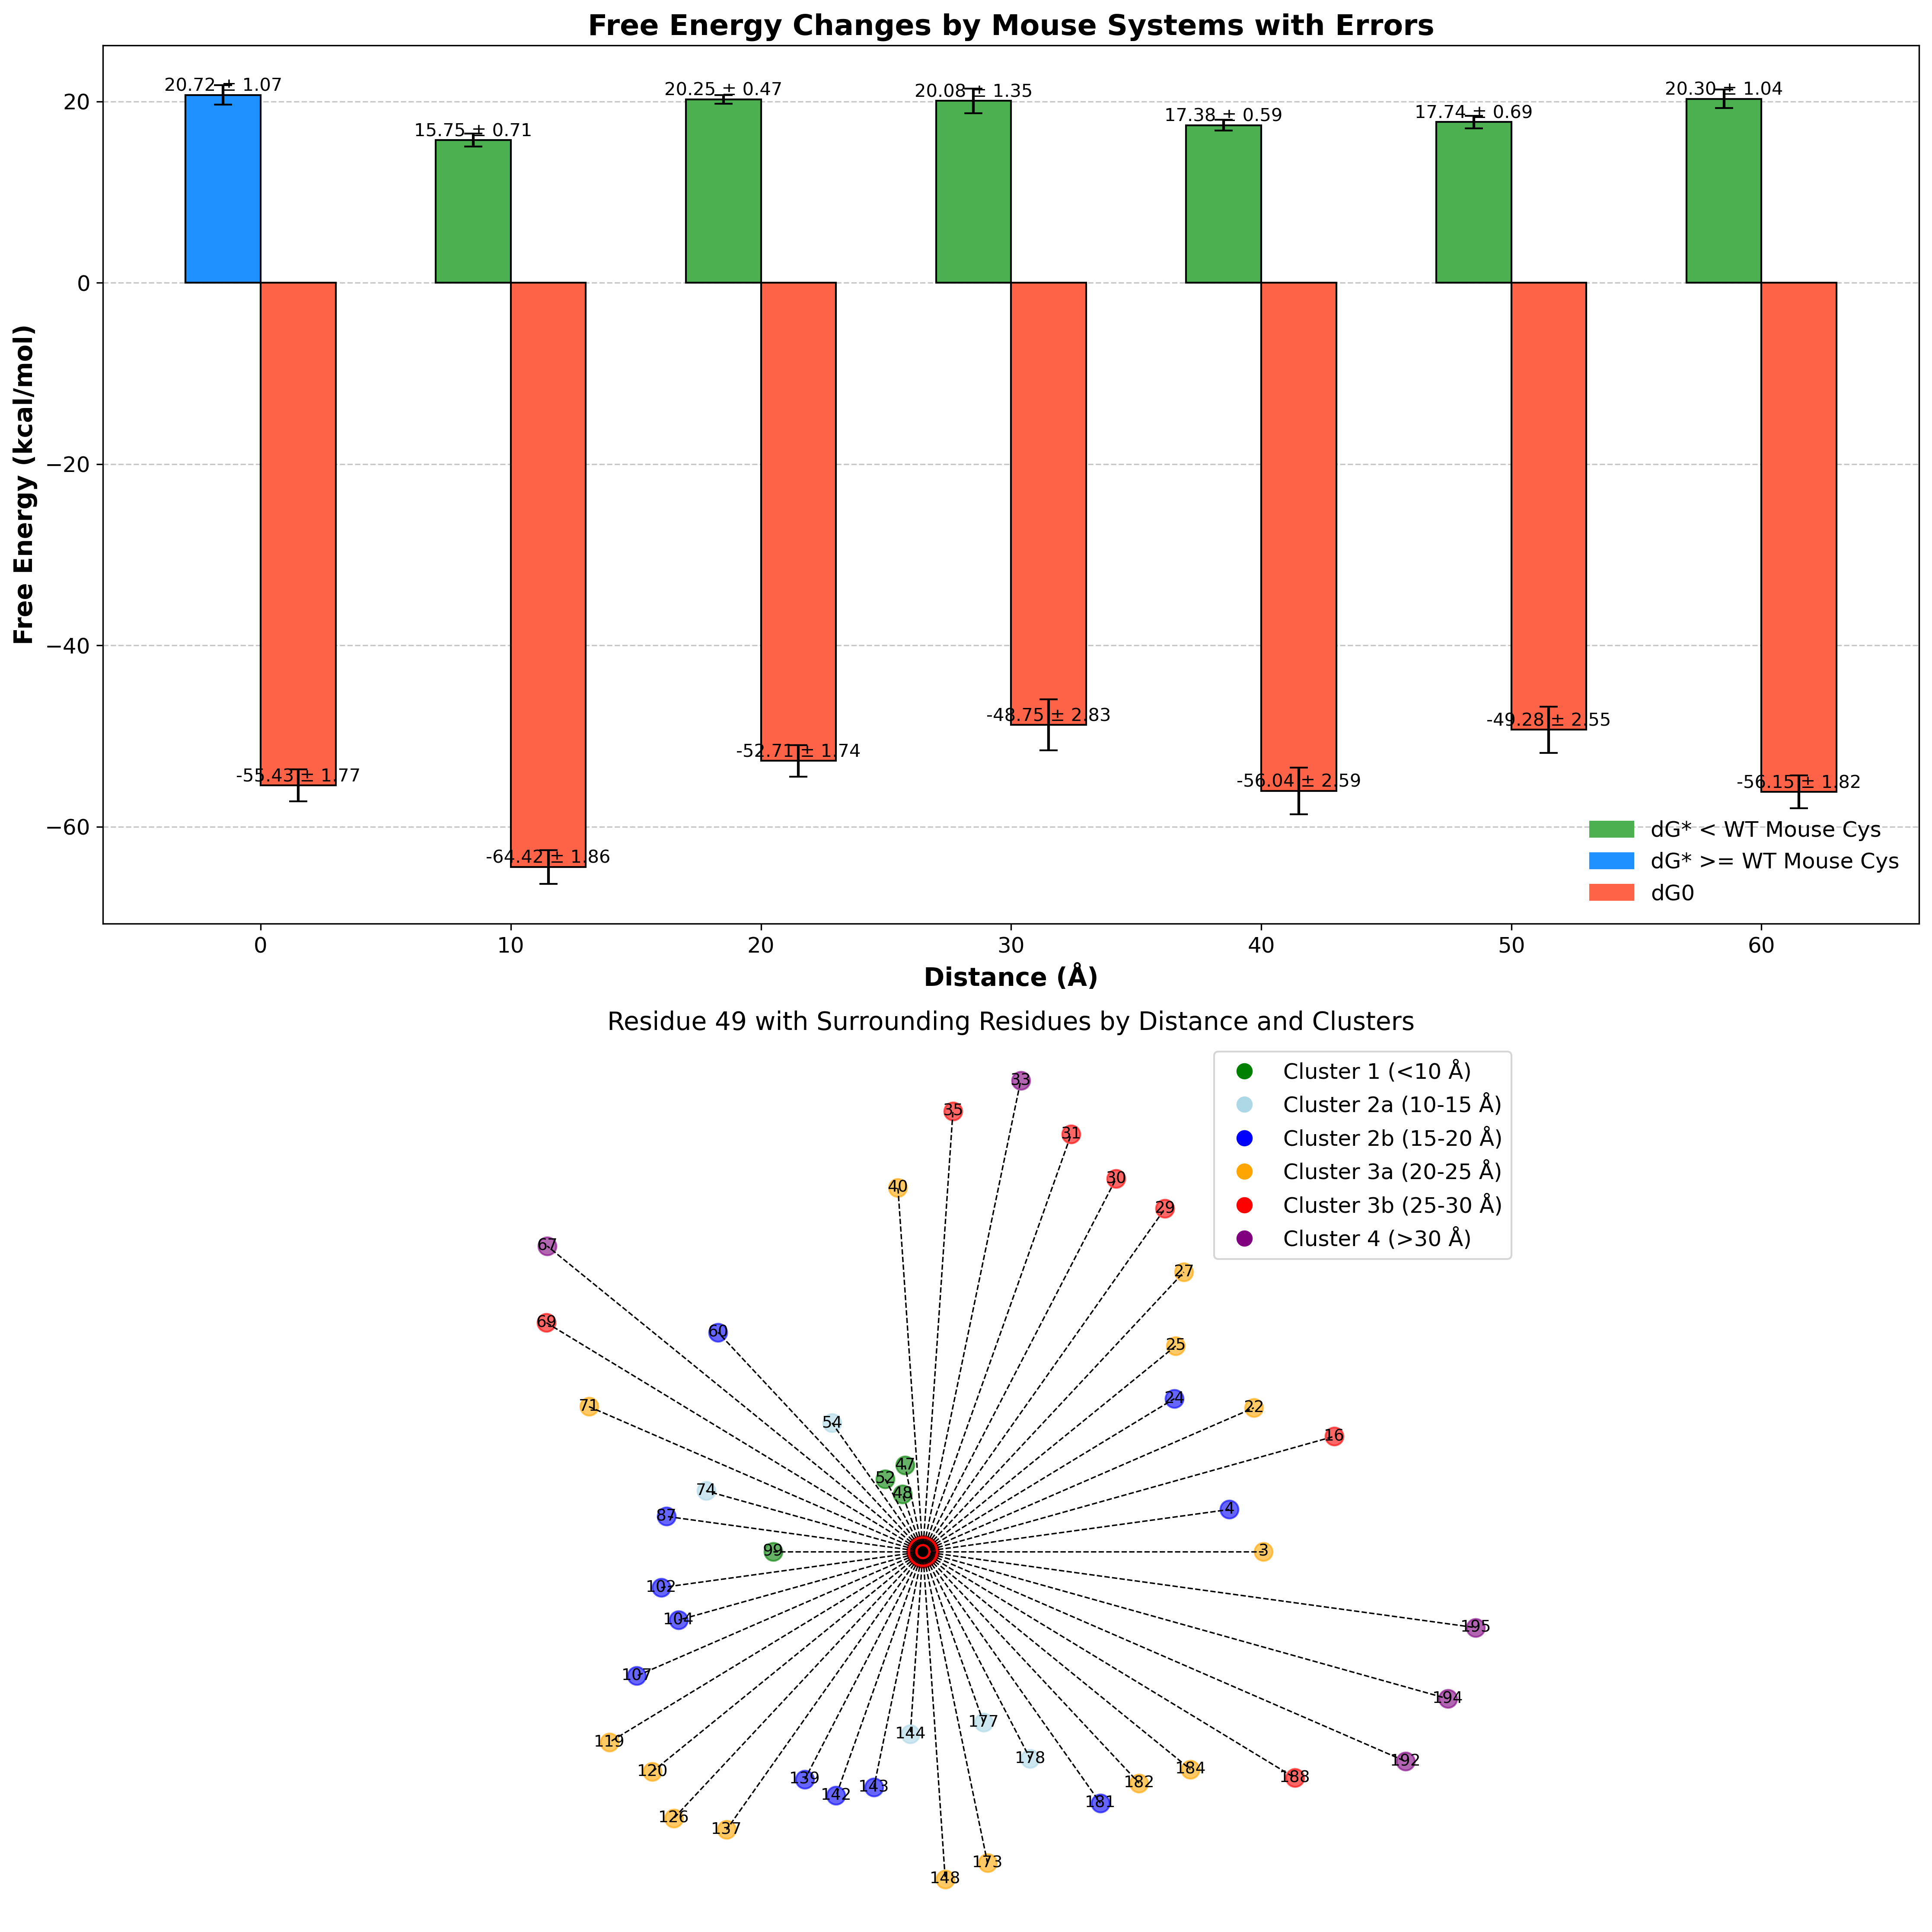

In [15]:
import matplotlib.pyplot as plt
import numpy as np
import re

# Residue numbers and distances (Å) provided
residues = [
    (3, 21.63), (4, 19.64), (16, 27.12), (22, 22.91), (24, 18.69), 
    (25, 20.7), (27, 24.28), (29, 26.66), (30, 26.67), (31, 28.12),
    (33, 30.54), (35, 28.03), (40, 23.17), (47, 5.59), (48, 3.88),
    (52, 5.2), (54, 10.0), (60, 19.05), (67, 30.74), (69, 27.97),
    (71, 23.11), (74, 14.29), (87, 16.44), (99, 9.5), (102, 16.77),
    (104, 16.1), (107, 19.8), (119, 23.3), (120, 22.14), (126, 23.16),
    (137, 21.6), (139, 16.28), (142, 16.44), (143, 15.29), (144, 11.6),
    (148, 20.84), (173, 20.19), (177, 11.51), (178, 14.81), (181, 19.54),
    (182, 20.11), (184, 21.9), (188, 27.64), (192, 33.41), (194, 34.61),
    (195, 35.43)
]

# Extract residue numbers and distances into separate lists
residue_numbers, distances = zip(*residues)

# File path to the Free_Energy.tex file and save directory
file_path = '/home/hp/nayanika/github/GPX6/table/Free_Energy.tex'
save_path = '/home/hp/nayanika/github/GPX6/figures/Combined_Free_Energy_and_Residue_Distances.png'

# Regular expression to capture the data from the table, including errors
regex = re.compile(
    r'([A-Za-z0-9,\s\-]+) & ([0-9.]+)\s?\\pm\s?([0-9.]+) kcal/mol & ([0-9.\-]+)\s?\\pm\s?([0-9.]+) kcal/mol'
)

# Lists to store the extracted data
systems = []
dg_star_values = []
dg_star_errors = []
dg_zero_values = []
dg_zero_errors = []

# Read the .tex file and extract data for Mouse Cys and Mouse Sec only
with open(file_path, 'r') as f:
    for line in f:
        match = regex.search(line)
        if match:
            system_name = match.group(1).strip()
            if "Mouse Cys" in system_name or "Mouse Sec" in system_name:  # Filter entries
                systems.append(system_name)
                dg_star_values.append(float(match.group(2).strip()))
                dg_star_errors.append(float(match.group(3).strip()))
                dg_zero_values.append(float(match.group(4).strip()))
                dg_zero_errors.append(float(match.group(5).strip()))

# Ensure 'WT Mouse Cys' is found in the list
wt_mouse_cys_dg_star = None
for i, system in enumerate(systems):
    if "WT Mouse Cys" in system:
        wt_mouse_cys_dg_star = dg_star_values[i]
        break

if wt_mouse_cys_dg_star is None:
    raise ValueError("WT Mouse Cys dG* value not found in the table.")

# Threshold for low dG* values (set to WT Mouse Cys dG* value)
low_dg_star_threshold = wt_mouse_cys_dg_star

# Assign each system to specific x-axis positions (0, 10, 20, etc.)
x_positions = np.arange(0, len(systems) * 10, 10)  # Evenly spaced at 10 Å intervals
width = 3  # Adjust the bar width to fit the spacing

# Define clusters based on distance ranges
def get_cluster(dist):
    if dist < 10:
        return 'Cluster 1', 'green'  # Cluster 1 (0-10 Å)
    elif 10 <= dist < 15:
        return 'Cluster 2a', 'lightblue'  # Cluster 2a (10-15 Å)
    elif 15 <= dist < 20:
        return 'Cluster 2b', 'blue'   # Cluster 2b (15-20 Å)
    elif 20 <= dist < 25:
        return 'Cluster 3a', 'orange'  # Cluster 3a (20-25 Å)
    elif 25 <= dist < 30:
        return 'Cluster 3b', 'red'  # Cluster 3b (25-30 Å)
    else:
        return 'Cluster 4', 'purple'  # Cluster 4 (30-35 Å)

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(15, 15), dpi=300)

# Bar plot for Free Energy values
bar_colors_dg_star = [
    '#4CAF50' if val < low_dg_star_threshold else '#1E90FF' for val in dg_star_values
]
bar_colors_dg_zero = ['#FF6347'] * len(dg_zero_values)  # Constant Tomato color for dG0

bars1 = ax1.bar(
    x_positions - width / 2, dg_star_values, width, label='Mean dG* (kcal/mol)',
    color=bar_colors_dg_star, edgecolor='black', yerr=dg_star_errors, capsize=5
)
bars2 = ax1.bar(
    x_positions + width / 2, dg_zero_values, width, label='Mean dG0 (kcal/mol)',
    color=bar_colors_dg_zero, edgecolor='black', yerr=dg_zero_errors, capsize=5
)

# Add labels and title for the Free Energy plot
ax1.set_xlabel('Distance (Å)', fontsize=14, fontweight='bold')
ax1.set_ylabel('Free Energy (kcal/mol)', fontsize=14, fontweight='bold')
ax1.set_title('Free Energy Changes by Mouse Systems with Errors', fontsize=16, fontweight='bold')
ax1.set_xticks(x_positions)
ax1.set_xticklabels([str(pos) for pos in x_positions], fontsize=12)

# Adding custom labels to each bar with both mean and error values
for i, rect in enumerate(bars1):
    height = rect.get_height()
    ax1.text(
        rect.get_x() + rect.get_width() / 2, height, 
        f'{dg_star_values[i]:.2f} ± {dg_star_errors[i]:.2f}', 
        ha='center', va='bottom', fontsize=10, color='black'
    )

for i, rect in enumerate(bars2):
    height = rect.get_height()
    ax1.text(
        rect.get_x() + rect.get_width() / 2, height, 
        f'{dg_zero_values[i]:.2f} ± {dg_zero_errors[i]:.2f}', 
        ha='center', va='bottom', fontsize=10, color='black'
    )

# Custom legend with simplified text
handles = [
    plt.Rectangle((0, 0), 1, 1, color='#4CAF50', label='dG* < WT Mouse Cys'),
    plt.Rectangle((0, 0), 1, 1, color='#1E90FF', label='dG* >= WT Mouse Cys'),
    plt.Rectangle((0, 0), 1, 1, color='#FF6347', label='dG0')
]
ax1.legend(handles=handles, fontsize=12, frameon=False)

# Improve grid visibility and style for the Free Energy plot
ax1.grid(True, axis='y', linestyle='--', alpha=0.7)
ax1.set_axisbelow(True)

# Increase the size of tick labels for the Free Energy plot
ax1.tick_params(axis='both', which='major', labelsize=12)

# Plotting the circular layout for residue distances
angles = np.linspace(0, 2 * np.pi, len(residues), endpoint=False)
ax2.set_aspect('equal')

# Plot residue 49 at the center (red circle)
ax2.scatter(0, 0, s=300, color='red', label='Residue 49')

# Plot surrounding residues based on distances and clusters
for i, (residue, dist) in enumerate(residues):
    # Get cluster information
    cluster_label, color = get_cluster(dist)
    
    # Calculate x and y coordinates based on angle and distance
    x = dist * np.cos(angles[i])
    y = dist * np.sin(angles[i])
    
    # Plot circles for residues with cluster colors
    ax2.scatter(x, y, s=100, color=color, label=cluster_label if i == 0 else "", alpha=0.6)
    
    # Annotate the residue numbers
    ax2.text(x, y, f"{residue}", fontsize=9, ha='center', va='center')
    
    # Draw a line from residue 49 (center) to each surrounding residue
    ax2.plot([0, x], [0, y], color='black', linestyle='--', linewidth=0.8)

# Add cluster legend
cluster_handles = [
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='green', markersize=10, label='Cluster 1 (<10 Å)'),
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='lightblue', markersize=10, label='Cluster 2a (10-15 Å)'),
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10, label='Cluster 2b (15-20 Å)'),
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='orange', markersize=10, label='Cluster 3a (20-25 Å)'),
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10, label='Cluster 3b (25-30 Å)'),
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='purple', markersize=10, label='Cluster 4 (>30 Å)')
]
ax2.legend(handles=cluster_handles, loc='upper right', fontsize=12)

# Set title for the residue plot
ax2.set_title('Residue 49 with Surrounding Residues by Distance and Clusters', fontsize=14)

# Remove axes for better visualization
ax2.axis('off')

# Tight layout for saving
plt.tight_layout()

# Save the figure
plt.savefig(save_path, bbox_inches='tight', dpi=300)

# Show the plot (optional)
plt.show()
